<a href="https://colab.research.google.com/github/calmrocks/master-machine-learning-engineer/blob/main/BasicConcepts/OverfittingAndUnderFitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Underfitting and Overfitting in Machine Learning

## Introduction
Underfitting and overfitting are two fundamental concepts in machine learning that represent the two extremes of model performance. Understanding these concepts is crucial for building effective machine learning models.

- **Underfitting**: Model is too simple to capture the underlying patterns
- **Overfitting**: Model is too complex and captures noise in the training data
- **Good fit**: Model captures the true underlying patterns without fitting to noise

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 1. Creating Synthetic Data

Let's create a dataset with a non-linear pattern to demonstrate these concepts:

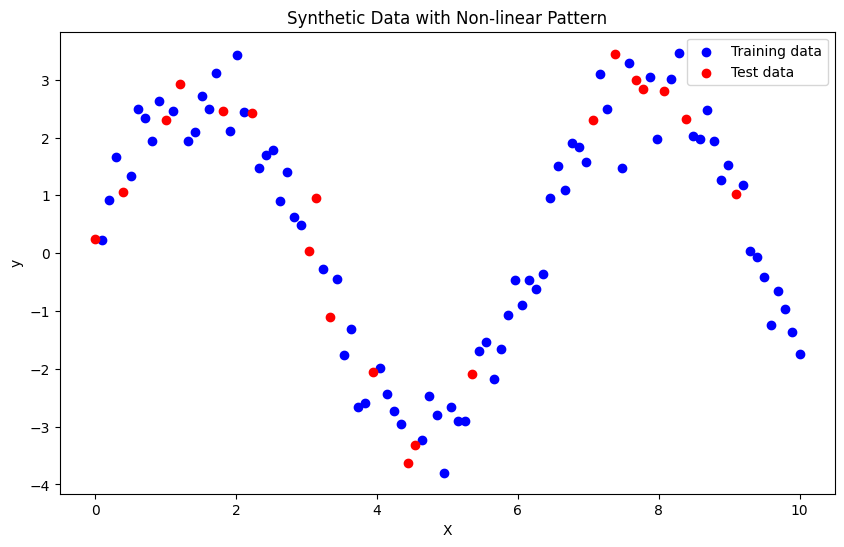

In [2]:
# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * np.sin(X.ravel()) + np.random.normal(0, 0.5, 100)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data with Non-linear Pattern')
plt.legend()
plt.show()

## 2. Demonstrating Underfitting (Linear Model)

A linear model will underfit this non-linear data:

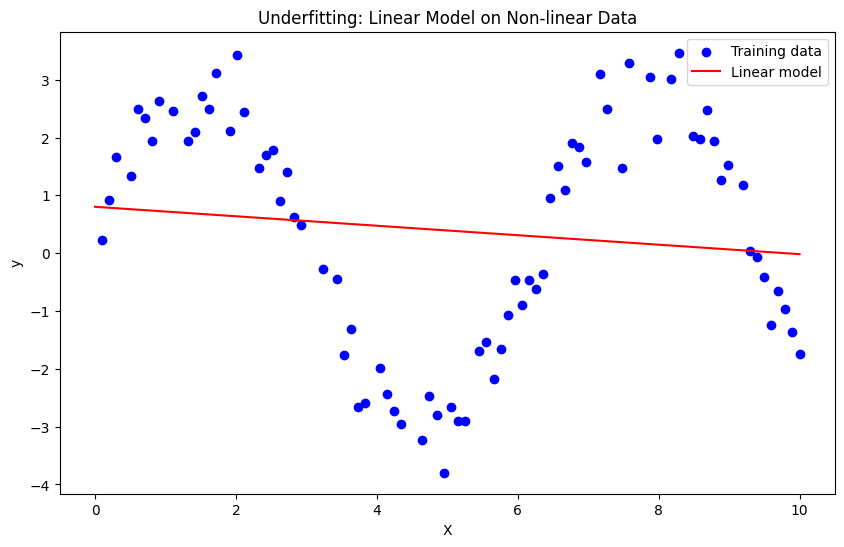

Linear Model - Training MSE: 3.9330
Linear Model - Test MSE: 5.1765


In [3]:
# Fit linear model (underfitting)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X, y_pred_linear, color='red', label='Linear model')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Underfitting: Linear Model on Non-linear Data')
plt.legend()
plt.show()

# Calculate training and test errors
train_error_linear = mean_squared_error(y_train, linear_model.predict(X_train))
test_error_linear = mean_squared_error(y_test, linear_model.predict(X_test))
print(f"Linear Model - Training MSE: {train_error_linear:.4f}")
print(f"Linear Model - Test MSE: {test_error_linear:.4f}")

## 3. Demonstrating Good Fit (Polynomial Degree 3)

A polynomial of degree 3 might provide a good fit:

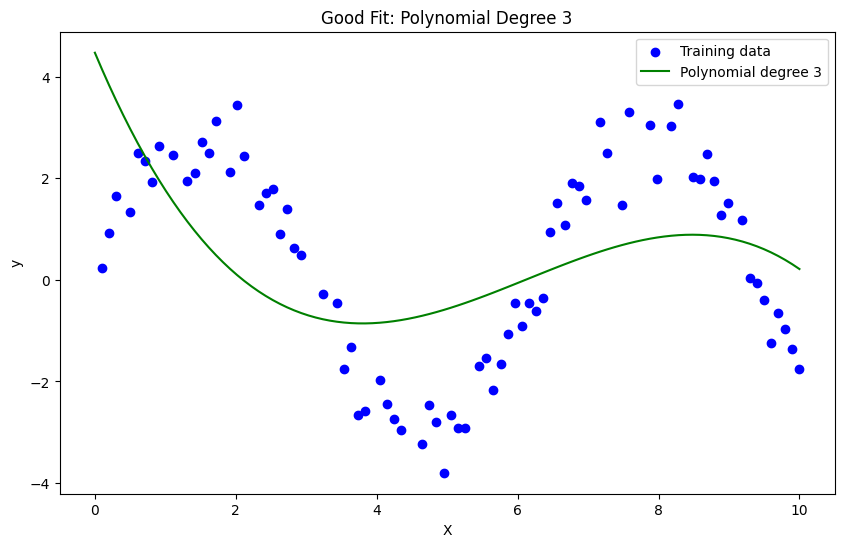

Polynomial Degree 3 - Training MSE: 2.8288
Polynomial Degree 3 - Test MSE: 4.2676


In [5]:
# Create polynomial features (degree 3)
poly_features_3 = PolynomialFeatures(degree=3)
X_train_poly_3 = poly_features_3.fit_transform(X_train)
X_test_poly_3 = poly_features_3.transform(X_test)
X_poly_3 = poly_features_3.transform(X)

# Fit polynomial model
poly_model_3 = LinearRegression()
poly_model_3.fit(X_train_poly_3, y_train)

# Make predictions
y_pred_poly_3 = poly_model_3.predict(X_poly_3)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X, y_pred_poly_3, color='green', label='Polynomial degree 3')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Good Fit: Polynomial Degree 3')
plt.legend()
plt.show()

# Calculate errors
train_error_poly_3 = mean_squared_error(y_train, poly_model_3.predict(X_train_poly_3))
test_error_poly_3 = mean_squared_error(y_test, poly_model_3.predict(X_test_poly_3))
print(f"Polynomial Degree 3 - Training MSE: {train_error_poly_3:.4f}")
print(f"Polynomial Degree 3 - Test MSE: {test_error_poly_3:.4f}")

## 4. Demonstrating Overfitting (Polynomial Degree 15)

A high-degree polynomial will overfit the data:

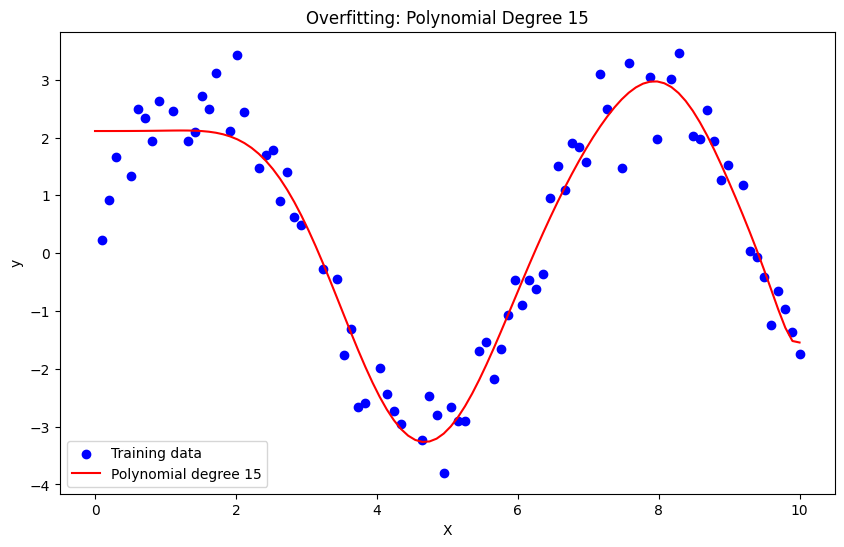

Polynomial Degree 15 - Training MSE: 0.2916
Polynomial Degree 15 - Test MSE: 0.4236


In [6]:
# Create polynomial features (degree 15)
poly_features_15 = PolynomialFeatures(degree=15)
X_train_poly_15 = poly_features_15.fit_transform(X_train)
X_test_poly_15 = poly_features_15.transform(X_test)
X_poly_15 = poly_features_15.transform(X)

# Fit polynomial model
poly_model_15 = LinearRegression()
poly_model_15.fit(X_train_poly_15, y_train)

# Make predictions
y_pred_poly_15 = poly_model_15.predict(X_poly_15)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X, y_pred_poly_15, color='red', label='Polynomial degree 15')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Overfitting: Polynomial Degree 15')
plt.legend()
plt.show()

# Calculate errors
train_error_poly_15 = mean_squared_error(y_train, poly_model_15.predict(X_train_poly_15))
test_error_poly_15 = mean_squared_error(y_test, poly_model_15.predict(X_test_poly_15))
print(f"Polynomial Degree 15 - Training MSE: {train_error_poly_15:.4f}")
print(f"Polynomial Degree 15 - Test MSE: {test_error_poly_15:.4f}")

## 5. Comparing All Models

Let's visualize all models together and compare their performance:

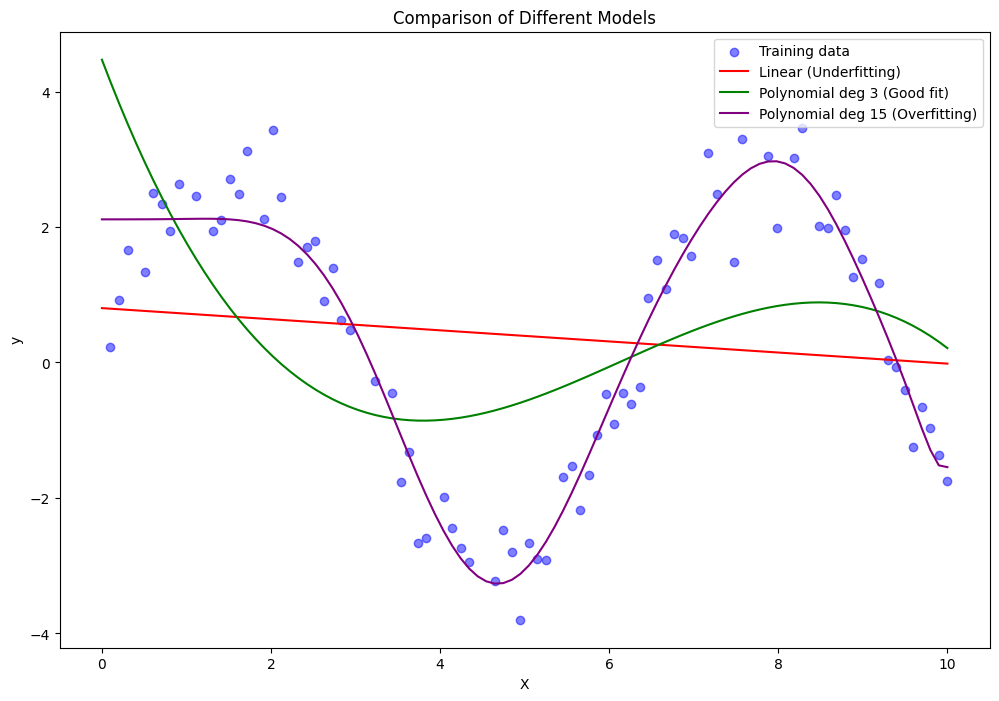


Linear (Underfitting):
Training MSE: 3.9330
Test MSE: 5.1765

Polynomial deg 3 (Good fit):
Training MSE: 2.8288
Test MSE: 4.2676

Polynomial deg 15 (Overfitting):
Training MSE: 0.2916
Test MSE: 0.4236


In [8]:
# Plot all models
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training data')
plt.plot(X, y_pred_linear, color='red', label='Linear (Underfitting)')
plt.plot(X, y_pred_poly_3, color='green', label='Polynomial deg 3 (Good fit)')
plt.plot(X, y_pred_poly_15, color='purple', label='Polynomial deg 15 (Overfitting)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of Different Models')
plt.legend()
plt.show()

# Compare errors
models = {
    'Linear (Underfitting)': [train_error_linear, test_error_linear],
    'Polynomial deg 3 (Good fit)': [train_error_poly_3, test_error_poly_3],
    'Polynomial deg 15 (Overfitting)': [train_error_poly_15, test_error_poly_15]
}

for model_name, errors in models.items():
    print(f"\n{model_name}:")
    print(f"Training MSE: {errors[0]:.4f}")
    print(f"Test MSE: {errors[1]:.4f}")

## 6. Learning Curves

Learning curves help visualize how model performance changes with training data size:

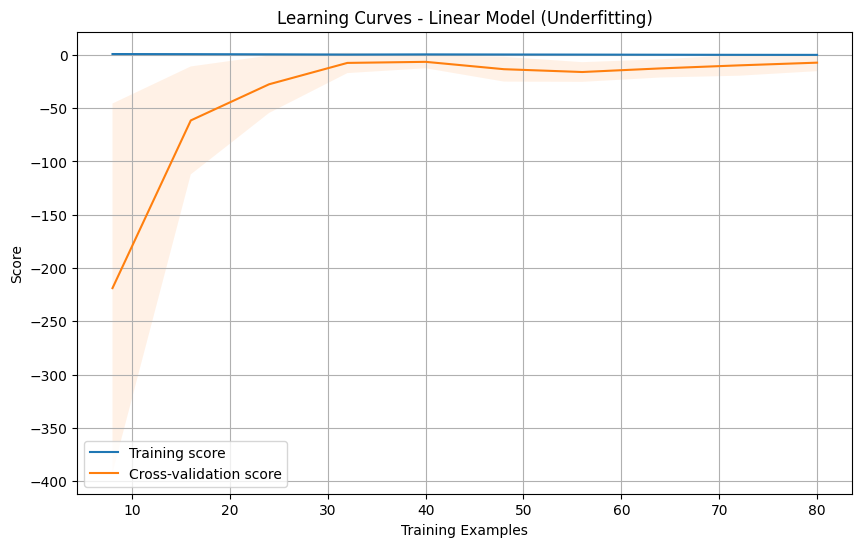

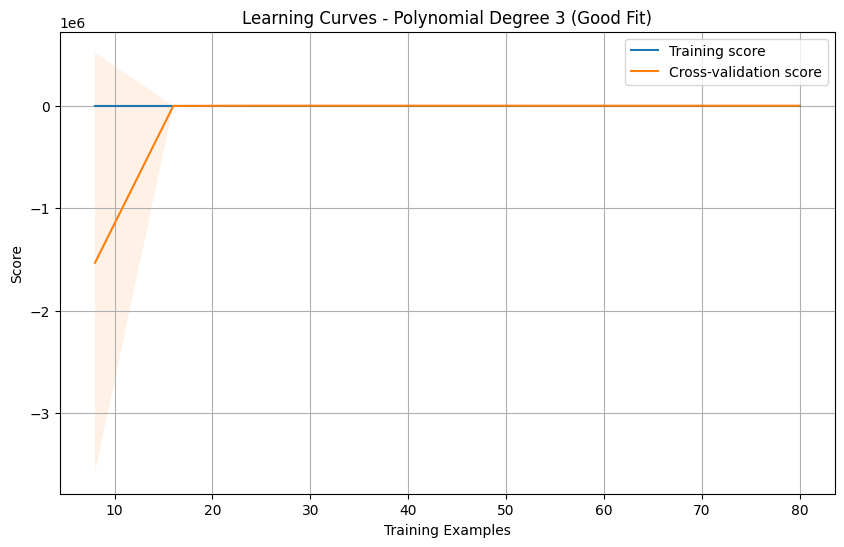

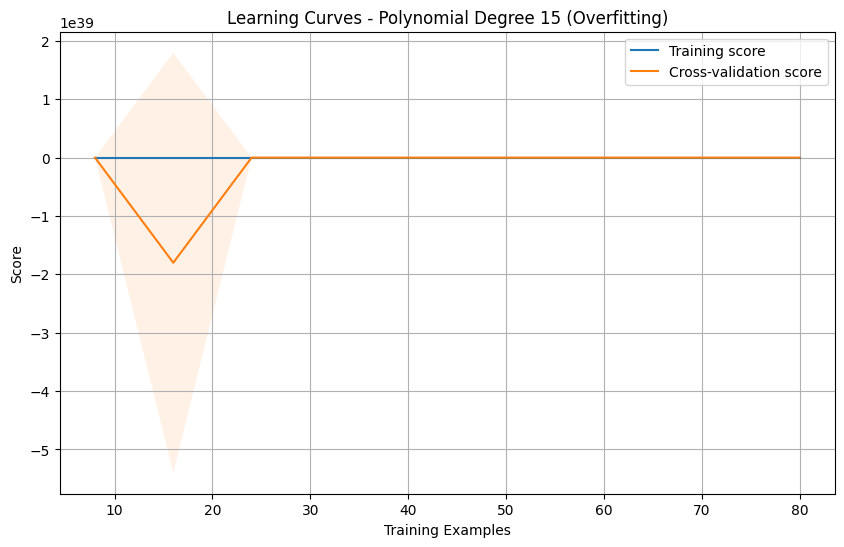

In [9]:
from sklearn.model_selection import learning_curve

def plot_learning_curves(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10))

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Plot learning curves for different models
plot_learning_curves(linear_model, X, y, 'Learning Curves - Linear Model (Underfitting)')
plot_learning_curves(poly_model_3, poly_features_3.fit_transform(X), y,
                    'Learning Curves - Polynomial Degree 3 (Good Fit)')
plot_learning_curves(poly_model_15, poly_features_15.fit_transform(X), y,
                    'Learning Curves - Polynomial Degree 15 (Overfitting)')

## Summary

### Key Characteristics:

1. **Underfitting**:
   - High bias, low variance
   - High training error
   - High test error
   - Model is too simple

2. **Good Fit**:
   - Balance between bias and variance
   - Reasonable training error
   - Reasonable test error
   - Model complexity matches data complexity

3. **Overfitting**:
   - Low bias, high variance
   - Low training error
   - High test error
   - Model is too complex

### Solutions:

1. **For Underfitting**:
   - Increase model complexity
   - Add more features
   - Decrease regularization

2. **For Overfitting**:
   - Reduce model complexity
   - Use regularization
   - Get more training data
   - Feature selection/reduction